[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dimso\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dimso\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


              precision    recall  f1-score   support

       false       0.88      0.68      0.77        78
   non-rumor       0.68      0.90      0.77        81
        true       0.91      0.84      0.87        74
  unverified       0.79      0.75      0.77        65

    accuracy                           0.80       298
   macro avg       0.82      0.79      0.80       298
weighted avg       0.81      0.80      0.80       298



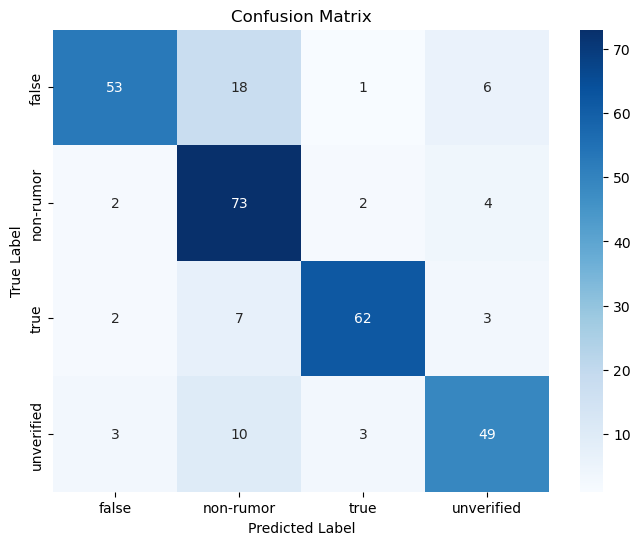

In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load data
source_tweets_file = r'C:\Users\dimso\Downloads\source_tweets.txt'
labels_file = r'C:\Users\dimso\Downloads\label.txt'

# Load source tweets
source_tweets = []
with open(source_tweets_file, 'r', encoding='utf-8') as f:
    for line in f:
        tweet_id, tweet_text = line.strip().split('\t')
        source_tweets.append({'tweet_id': tweet_id, 'tweet_text': tweet_text})

# Load labels
labels = {}
with open(labels_file, 'r', encoding='utf-8') as f:
    for line in f:
        label, tweet_id = line.strip().split(':')
        labels[tweet_id] = label

# Match tweets with their labels
matched_tweets = []
for tweet in source_tweets:
    tweet_id = tweet['tweet_id']
    if tweet_id in labels:
        tweet['label'] = labels[tweet_id]
        matched_tweets.append(tweet)

# Create DataFrame
df = pd.DataFrame(matched_tweets)

# Preprocess text data
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned_text'] = df['tweet_text'].apply(preprocess_text)

# TF-IDF Transformation
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text'])
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Train-Test Split
X = X_df
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



In [25]:
import random

# Function to display a random tweet with its label
def display_random_tweet():
    # Randomly select an index from the DataFrame
    random_index = random.randint(0, len(df) - 1)
    
    # Get the tweet and its label
    random_tweet = df.iloc[random_index]
    tweet_text = random_tweet['tweet_text']
    cleaned_text = random_tweet['cleaned_text']
    true_label = random_tweet['label']
    
    # Print the original and cleaned tweet, and the true label
    print(f"Original Tweet: {tweet_text}")
    print(f"Cleaned Tweet: {cleaned_text}")
    print(f"True Label: {true_label}")
    
    # Predict the label using the trained model
    tweet_vectorized = vectorizer.transform([cleaned_text])  # Transform cleaned text to vector
    predicted_label = model.predict(tweet_vectorized)[0]  # Get the predicted label
    
    # Print the predicted label
    print(f"Predicted Label: {predicted_label}")
    
# Call the function to display a random tweet
display_random_tweet()


Original Tweet: corporal nathan cirillo, shot dead at #ottawa war memorial today, was 24. reservist was member of argyll and sutherland highlanders #cdnpoli
Cleaned Tweet: corporal nathan cirillo shot dead ottawa war memorial today reservist member argyll sutherland highlanders cdnpoli
True Label: true
Predicted Label: true


C:\Users\dimso\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
